## Lead Scoring Case Study

An education company named X Education provides online courses to working professionals. Generally, there are many visitors on their website browsing for courses. The company markets its courses on several websites and search engines. Then there are several probabilities: some of the visitors browse the website or they fill up the form or watch some videos. Also, the company gets some leads through past referrals. Then the company initiates its marketing campaigns based on the acquired leads. The conversion rate of leads to enrollment is as low as 30%. The CEO sets the target conversion rate to 80%.

#### Objective of the case study: 

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
- Handle other problems presented by the company by the model in order to adjust according to the changes in the company's future requirements. 

#### Read and understanding of the dataset "Leads.csv"

In [1]:
# Supress unnecessary warnings 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries 
import numpy as np, pandas as pd

In [3]:
# Read the Leads.csv file
df_leads = pd.read_csv("Leads.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1000)

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_leads.shape

(9240, 37)

In [6]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check the info to know the feature varaible types and the presence of null values 
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Check for the missing values in every column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

The number of rows in the dataset are 9240 and there are some columns having almost 50% of missing values. Following the usual criteria in a data cleaning or exploratory data analysis, the columns having more than 30% or 40% of missing values can be removed from the dataframe. Therefore, the columns having more than 3000 missing values can be eliminated from the df_leads dataframe.   

In [9]:
# Drop all the columns having greater than 3000 missing values 
for column in df_leads.columns:
    if df_leads[column].isnull().sum() > 3000:
        df_leads.drop(column, 1, inplace = True)

In [10]:
# Check the dataframe for null values again
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Since the courses are offered online, the variables "City" and "Country" is not important for the sales or marketing purpose. Hence, these columns can also be dropped for the analysis. Also, the features "Prospect ID" and "Lead Number" will not useful for analysis as they are for individual identification. Hence, dropping them will be more helpful. 

In [11]:
# Drop "City", "Country", "Prospect ID" and "Lead Number" columns from the dataframe
df_leads.drop(["City", "Country", "Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [12]:
# Check the percentage of missing values in the dataframe
round((df_leads.isnull().sum()/len(df_leads.index)) * 100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
df_leads.head(100)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.00,Email Opened,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened


There are some columns which have a category as "Select" implying that the visitor on the website did not select any option for that particular feature. The "Select" values can also be treated as the missing values and hence it would be useful to get the value counts. 

In [14]:
# Print value counts of features in all the categorical columns
for feature in df_leads:
    print(df_leads[feature].astype('category').value_counts())
    print('------------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
---------------------------------------------------

On checking for the value counts in the categorical features, the columns "Specialization", " How did you hear about X Education" and "Lead Profile" have the values of 'Select'. Hence, due to the high number of 'Select' values, the columns "How did you hear about X Education" and "Lead Profile" can be dropped for the analysis.

In [15]:
df_leads.drop(['How did you hear about X Education', 'Lead Profile'], axis = 1, inplace = True)

On checking for the value counts for the categorical features of the dataframe, there are several columns or features which have almost all value counts of 'No'. The columns "Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque" can be dropped as they do not prove to be useful for analysis. Also, the feature "What matters most to you in choosing a course" has 6528 counts of "Better Career Prospects" and only 2 counts of "Flexibility & Convenience" and one count of "Other". Hence, this column can also be dropped along with the above mentioned columns. 

In [16]:
# Drop the columns having almost all 'No' value counts
df_leads.drop(['What matters most to you in choosing a course', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1, inplace = True) 

In [17]:
# Check for the null values in the dataframe
df_leads.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The features "Specialization" and "What is your current occupation" are still very important even after having so many null values. These features help in identifying the target customers and so the alternative here would be to drop the rows from the dataframe having null values. 

In [18]:
# Dropping only the rows with null values in the remaining columns
for row in df_leads.columns:
    df_leads = df_leads[~pd.isnull(df_leads[row])]

In [19]:
# Check for the null value counts
df_leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [20]:
# Check for the percentage of rows retained
print((len(df_leads.index) * 100)/9240)

68.97186147186147


Around 69% of rows have been retained which still makes it eligible for analysis. 

In [21]:
# Print the head of the dataframe
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Data preparation for modelling

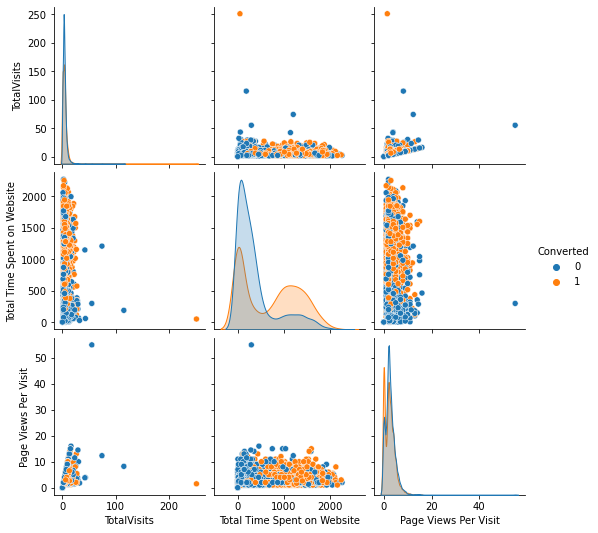

In [22]:
# import libraries for plots
import matplotlib.pyplot as plt, seaborn as sns
sns.pairplot(df_leads, hue = 'Converted')
plt.show()

#### Dummy variable creation

Looking back at the dataframe, the categorical features for which dummy variables have to be created are "Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "What is your current occupation", "A free copy of Mastering The Interview" and "Last Notable Activity". 

In [23]:
# Create dummy variables 
df_leads_dummy = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first = True)

In [24]:
# Add the dummy variables to the original dataframe 
df_leads = pd.concat([df_leads, df_leads_dummy], axis = 1)

A separate dummy variable for the "Specialization" feature needs to be created from which the 'Select' values have to be dropped as they are not useful for the analysis. 

In [25]:
# Create dummy variable separately for "Specialization" and drop the 'Select' dummy variables
specialization_dummy = pd.get_dummies(df_leads['Specialization'], prefix = 'Specialization')
specialization_dummy = specialization_dummy.drop(['Specialization_Select'], 1)
df_leads = pd.concat([df_leads, specialization_dummy], axis = 1)

In [26]:
# Drop the original variables after the creation of dummy variables for them
df_leads = df_leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [27]:
# Print the head of the dataframe
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Train-test split

In [28]:
# Import the necessary libraries for train-test split
from sklearn.model_selection import train_test_split

In [29]:
# Include all feature varibales in X
X = df_leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Include the target variable "Converted" in y
y = df_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [31]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### Feature Scaling

In [32]:
# Import the library for scaling the numerical features
from sklearn.preprocessing import MinMaxScaler

In [33]:
# Scale the numerical features in the dataframe
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


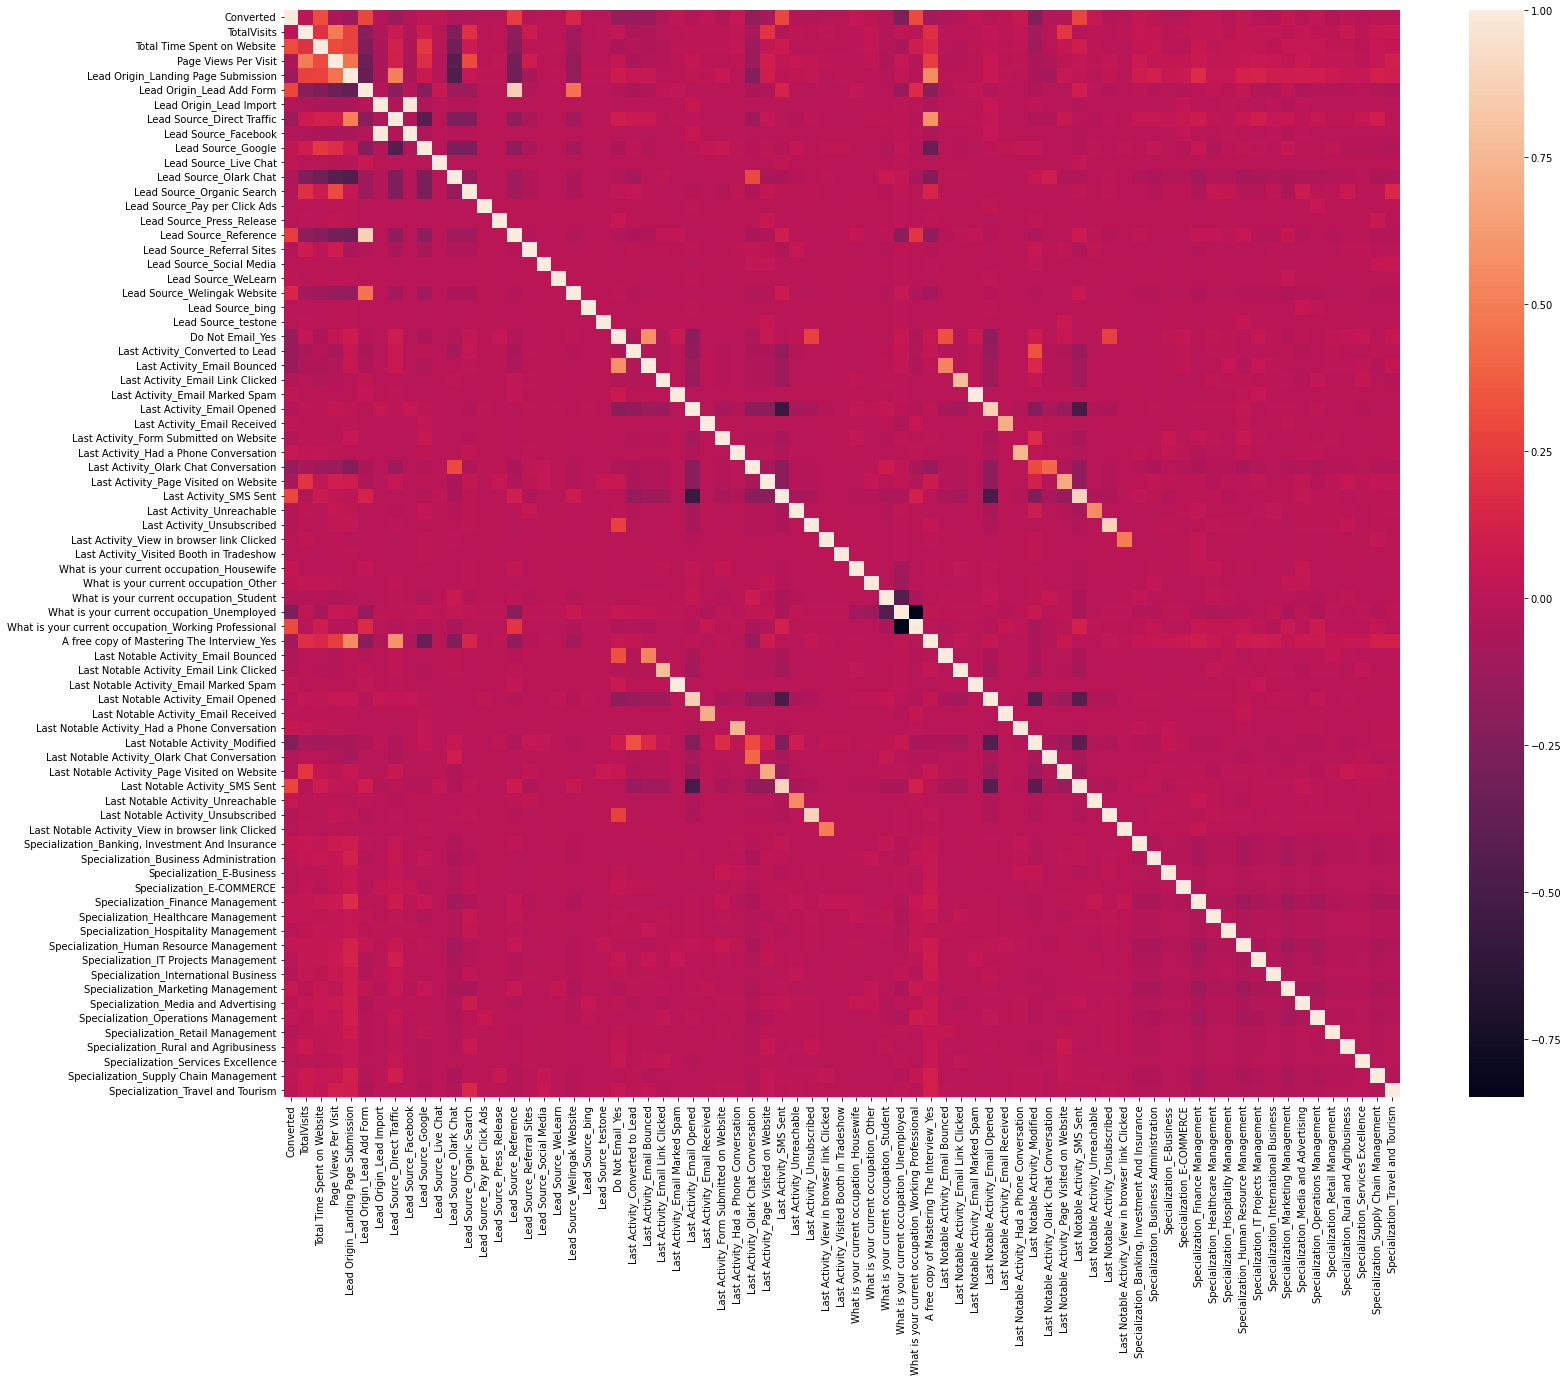

In [34]:
# Visualize the correlation
plt.figure(figsize = (25,20))
sns.heatmap(df_leads.corr())
plt.show()

### Model Building

In [35]:
# Import the library for logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [36]:
# Import RFE library 
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)                   # run RFE with 20 variables as output 
rfe = rfe.fit(X_train, y_train)

In [37]:
# Print features selected by RFE 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 53),
 ('Lead Source_WeLearn', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 33),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 20),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Cl

In [38]:
# Segregate the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [39]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [40]:
# Import statsmodel library
import statsmodels.api as sm

In [41]:
# Fit a logistic regression model on X_train after addition of a constant
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4440
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.4
Date:                Mon, 26 Dec 2022   Deviance:                       4038.7
Time:                        08:23:15   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7083      0.607     -1.166      0.244      -1.899       0.482
TotalVisits                                              8.6822      2.585      3.359      0.001       3.615      13.749
Total Time Spent on Website                              4.4003      0.187     23.550      0.000       4.034       4.766
Lead Origin_Lead Add Form                                2.9442      1.210      2.433      0.015       0.572       5.316
Lead Source_Olark Chat                                   1.5531      0.127     12.219      0.000       1.304       1.802
Lead Source_Reference                                    1.2610      1.233      1.023      0.306      -1.156       3.678
Lead Source_Welingak Website                             3.3115      1.573      2.106      0.035       0.229       6.394
Do Not Email_Yes                                        -1.4072      0.223     -6.310      0.000      -1.844      -0.970
Last Activity_Email Bounced                             -1.0803      0.662     -1.631      0.103      -2.378       0.218
Last Activity_Had a Phone Conversation                   1.4850      0.984      1.510      0.131      -0.443       3.413
Last Activity_Olark Chat Conversation                   -0.6503      0.192     -3.393      0.001      -1.026      -0.275
Last Activity_SMS Sent                                   0.9648      0.086     11.232      0.000       0.796       1.133
What is your current occupation_Housewife               22.5870    2.4e+04      0.001      0.999    -4.7e+04     4.7e+04
What is your current occupation_Student                 -1.1422      0.640     -1.785      0.074      -2.396       0.112
What is your current occupation_Unemployed              -1.3134      0.601     -2.184      0.029      -2.492      -0.135
What is your current occupation_Working Professional     1.2988      0.631      2.058      0.040       0.062       2.536
Last Notable Activity_Email Bounced                      1.4182      0.798      1.778      0.075      -0.145       2.982
Last Notable Activity_Had a Phone Conversation          22.3445   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
Last Notable Activity_Modified                          -0.7018      0.095     -7.414      0.000      -0.887      -0.516
Last Notable Activity_Unreachable                        2.5031      0.808      3.099      0.002       0.920       4.086
Specialization_Banking, Investment And Insurance         0.5498      0.204      2.692      0.007       0.150       0.950
========================================================================================================================
"""

Before eliminating the variables on the basis of p-values, information on the variance inflation factors (VIF).  

In [42]:
# Import library for the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Print VIFs for all the variables of the dataframe
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.21
4,Lead Source_Reference,65.21
5,Lead Source_Welingak Website,20.03
13,What is your current occupation_Unemployed,4.63
8,Last Activity_Had a Phone Conversation,2.45
16,Last Notable Activity_Had a Phone Conversation,2.45
1,Total Time Spent on Website,2.40
7,Last Activity_Email Bounced,2.01
17,Last Notable Activity_Modified,1.77
10,Last Activity_SMS Sent,1.74


Only the features "Lead Origin_Lead Add Form", "Lead Source_Reference" and "Lead Source_Reference" and "Lead Source_Welingak Website" have very high VIFs but all the other features desirably have <5 VIFs. The feature "Lead Source_Reference" is dropped first because the high p-value and VIF.

In [44]:
# Drop the "Lead Source_Reference" feature
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [45]:
# Fit the model again with the new set of feaatures
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4441
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.8
Date:                Mon, 26 Dec 2022   Deviance:                       4039.6
Time:                        08:23:29   Pearson chi2:                 4.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3809
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7076      0.607     -1.165      0.244      -1.898       0.483
TotalVisits                                              8.6793      2.585      3.357      0.001       3.612      13.746
Total Time Spent on Website                              4.4003      0.187     23.549      0.000       4.034       4.766
Lead Origin_Lead Add Form                                4.1668      0.260     16.019      0.000       3.657       4.677
Lead Source_Olark Chat                                   1.5529      0.127     12.217      0.000       1.304       1.802
Lead Source_Welingak Website                             2.0887      1.037      2.014      0.044       0.056       4.121
Do Not Email_Yes                                        -1.4049      0.223     -6.306      0.000      -1.842      -0.968
Last Activity_Email Bounced                             -1.0819      0.662     -1.634      0.102      -2.380       0.216
Last Activity_Had a Phone Conversation                   1.4853      0.984      1.510      0.131      -0.443       3.413
Last Activity_Olark Chat Conversation                   -0.6498      0.192     -3.391      0.001      -1.025      -0.274
Last Activity_SMS Sent                                   0.9649      0.086     11.234      0.000       0.797       1.133
What is your current occupation_Housewife               22.5884    2.4e+04      0.001      0.999    -4.7e+04    4.71e+04
What is your current occupation_Student                 -1.1419      0.640     -1.785      0.074      -2.396       0.112
What is your current occupation_Unemployed              -1.3143      0.601     -2.186      0.029      -2.493      -0.136
What is your current occupation_Working Professional     1.2990      0.631      2.059      0.039       0.062       2.536
Last Notable Activity_Email Bounced                      1.4176      0.798      1.777      0.076      -0.146       2.981
Last Notable Activity_Had a Phone Conversation          22.3444   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
Last Notable Activity_Modified                          -0.7020      0.095     -7.417      0.000      -0.887      -0.516
Last Notable Activity_Unreachable                        2.5036      0.808      3.099      0.002       0.920       4.087
Specialization_Banking, Investment And Insurance         0.5506      0.204      2.697      0.007       0.150       0.951
========================================================================================================================
"""

In [46]:
# Print the VIFs of the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,4.63
15,Last Notable Activity_Had a Phone Conversation,2.45
7,Last Activity_Had a Phone Conversation,2.45
1,Total Time Spent on Website,2.39
6,Last Activity_Email Bounced,2.01
16,Last Notable Activity_Modified,1.77
9,Last Activity_SMS Sent,1.74
2,Lead Origin_Lead Add Form,1.71
5,Do Not Email_Yes,1.65
13,What is your current occupation_Working Professional,1.65


All the variables have VIF <5. The features elimination can be done solely on p-values from now.

In [47]:
# Drop "Last Notable Activity_Had a Phone Conversation" because of high p-value
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [48]:
# Fit the model again with new set of features
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.6
Date:                Mon, 26 Dec 2022   Deviance:                       4043.2
Time:                        08:23:41   Pearson chi2:                 4.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3804
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7046      0.607     -1.160      0.246      -1.895       0.486
TotalVisits                                              8.7256      2.586      3.374      0.001       3.658      13.794
Total Time Spent on Website                              4.3956      0.187     23.529      0.000       4.029       4.762
Lead Origin_Lead Add Form                                4.1678      0.260     16.019      0.000       3.658       4.678
Lead Source_Olark Chat                                   1.5524      0.127     12.212      0.000       1.303       1.802
Lead Source_Welingak Website                             2.0879      1.037      2.013      0.044       0.055       4.121
Do Not Email_Yes                                        -1.4054      0.223     -6.309      0.000      -1.842      -0.969
Last Activity_Email Bounced                             -1.0741      0.662     -1.622      0.105      -2.372       0.224
Last Activity_Had a Phone Conversation                   2.6597      0.801      3.320      0.001       1.089       4.230
Last Activity_Olark Chat Conversation                   -0.6449      0.192     -3.365      0.001      -1.020      -0.269
Last Activity_SMS Sent                                   0.9636      0.086     11.220      0.000       0.795       1.132
What is your current occupation_Housewife               21.5890   1.46e+04      0.001      0.999   -2.85e+04    2.86e+04
What is your current occupation_Student                 -1.1433      0.640     -1.787      0.074      -2.397       0.111
What is your current occupation_Unemployed              -1.3146      0.601     -2.186      0.029      -2.493      -0.136
What is your current occupation_Working Professional     1.2978      0.631      2.057      0.040       0.061       2.534
Last Notable Activity_Email Bounced                      1.4085      0.798      1.766      0.077      -0.155       2.972
Last Notable Activity_Modified                          -0.7111      0.095     -7.523      0.000      -0.896      -0.526
Last Notable Activity_Unreachable                        2.5009      0.808      3.096      0.002       0.918       4.084
Specialization_Banking, Investment And Insurance         0.5644      0.203      2.776      0.005       0.166       0.963
========================================================================================================================
"""

In [49]:
# Drop "Last Activity_Email Bounced" feature because of high p-value
X_train.drop('Last Activity_Email Bounced', axis = 1, inplace = True)

In [50]:
# Fit the model again with the new set of features
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.2
Date:                Mon, 26 Dec 2022   Deviance:                       4046.5
Time:                        08:23:51   Pearson chi2:                 4.65e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3799
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6949      0.608     -1.144      0.253      -1.886       0.496
TotalVisits                                              8.9971      2.584      3.482      0.000       3.933      14.061
Total Time Spent on Website                              4.3946      0.187     23.537      0.000       4.029       4.761
Lead Origin_Lead Add Form                                4.1869      0.260     16.081      0.000       3.677       4.697
Lead Source_Olark Chat                                   1.5510      0.127     12.207      0.000       1.302       1.800
Lead Source_Welingak Website                             2.0933      1.038      2.018      0.044       0.060       4.127
Do Not Email_Yes                                        -1.5357      0.211     -7.286      0.000      -1.949      -1.123
Last Activity_Had a Phone Conversation                   2.6670      0.802      3.327      0.001       1.096       4.238
Last Activity_Olark Chat Conversation                   -0.6248      0.191     -3.264      0.001      -1.000      -0.250
Last Activity_SMS Sent                                   0.9756      0.086     11.383      0.000       0.808       1.144
What is your current occupation_Housewife               21.5844   1.46e+04      0.001      0.999   -2.85e+04    2.85e+04
What is your current occupation_Student                 -1.1577      0.640     -1.809      0.070      -2.412       0.097
What is your current occupation_Unemployed              -1.3290      0.602     -2.209      0.027      -2.508      -0.150
What is your current occupation_Working Professional     1.2759      0.631      2.023      0.043       0.039       2.512
Last Notable Activity_Email Bounced                      0.4662      0.520      0.897      0.370      -0.552       1.484
Last Notable Activity_Modified                          -0.7324      0.094     -7.799      0.000      -0.917      -0.548
Last Notable Activity_Unreachable                        2.5014      0.808      3.097      0.002       0.918       4.085
Specialization_Banking, Investment And Insurance         0.5640      0.203      2.773      0.006       0.165       0.963
========================================================================================================================
"""

In [51]:
# Drop "Last Notable Activity_Email Bounced" because of high p-value
X_train.drop('Last Notable Activity_Email Bounced', axis = 1, inplace = True)

In [52]:
# Fit the model again with the new set of features
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.6
Date:                Mon, 26 Dec 2022   Deviance:                       4047.2
Time:                        08:24:01   Pearson chi2:                 4.65e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3798
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6967      0.608     -1.146      0.252      -1.888       0.494
TotalVisits                                              8.9235      2.587      3.449      0.001       3.852      13.995
Total Time Spent on Website                              4.3954      0.187     23.544      0.000       4.029       4.761
Lead Origin_Lead Add Form                                4.1812      0.260     16.072      0.000       3.671       4.691
Lead Source_Olark Chat                                   1.5512      0.127     12.207      0.000       1.302       1.800
Lead Source_Welingak Website                             2.0879      1.037      2.013      0.044       0.055       4.121
Do Not Email_Yes                                        -1.4667      0.194     -7.567      0.000      -1.847      -1.087
Last Activity_Had a Phone Conversation                   2.6667      0.802      3.326      0.001       1.095       4.238
Last Activity_Olark Chat Conversation                   -0.6253      0.191     -3.267      0.001      -1.000      -0.250
Last Activity_SMS Sent                                   0.9683      0.085     11.357      0.000       0.801       1.135
What is your current occupation_Housewife               21.5893   1.46e+04      0.001      0.999   -2.85e+04    2.85e+04
What is your current occupation_Student                 -1.1518      0.640     -1.799      0.072      -2.406       0.103
What is your current occupation_Unemployed              -1.3222      0.602     -2.198      0.028      -2.501      -0.143
What is your current occupation_Working Professional     1.2853      0.631      2.037      0.042       0.049       2.522
Last Notable Activity_Modified                          -0.7379      0.094     -7.878      0.000      -0.922      -0.554
Last Notable Activity_Unreachable                        2.4975      0.808      3.092      0.002       0.914       4.081
Specialization_Banking, Investment And Insurance         0.5621      0.203      2.767      0.006       0.164       0.960
========================================================================================================================
"""

In [53]:
# Drop "What is your current occupation_Working Professional" because of high p-value
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [54]:
# Fit the model again with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.5
Date:                Mon, 26 Dec 2022   Deviance:                       4051.0
Time:                        08:24:07   Pearson chi2:                 4.61e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3793
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.4912      0.202      2.436      0.015       0.096       0.886
TotalVisits                                          8.6879      2.572      3.377      0.001       3.646      13.730
Total Time Spent on Website                          4.3946      0.187     23.540      0.000       4.029       4.760
Lead Origin_Lead Add Form                            4.1792      0.260     16.073      0.000       3.670       4.689
Lead Source_Olark Chat                               1.5478      0.127     12.196      0.000       1.299       1.797
Lead Source_Welingak Website                         2.0851      1.037      2.010      0.044       0.052       4.118
Do Not Email_Yes                                    -1.4661      0.194     -7.560      0.000      -1.846      -1.086
Last Activity_Had a Phone Conversation               2.6728      0.801      3.336      0.001       1.102       4.243
Last Activity_Olark Chat Conversation               -0.6194      0.191     -3.240      0.001      -0.994      -0.245
Last Activity_SMS Sent                               0.9733      0.085     11.433      0.000       0.806       1.140
What is your current occupation_Housewife           20.4045   1.45e+04      0.001      0.999   -2.85e+04    2.85e+04
What is your current occupation_Student             -2.3371      0.289     -8.086      0.000      -2.904      -1.771
What is your current occupation_Unemployed          -2.5075      0.189    -13.269      0.000      -2.878      -2.137
Last Notable Activity_Modified                      -0.7390      0.094     -7.893      0.000      -0.923      -0.556
Last Notable Activity_Unreachable                    2.4976      0.808      3.091      0.002       0.914       4.081
Specialization_Banking, Investment And Insurance     0.5648      0.203      2.782      0.005       0.167       0.963
====================================================================================================================
"""

All p-values are now the desired lower range. 

In [55]:
# Check the VIFs again for all the remaining variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,3.38
1,Total Time Spent on Website,2.01
12,Last Notable Activity_Modified,1.61
8,Last Activity_SMS Sent,1.59
0,TotalVisits,1.54
2,Lead Origin_Lead Add Form,1.46
3,Lead Source_Olark Chat,1.43
4,Lead Source_Welingak Website,1.31
7,Last Activity_Olark Chat Conversation,1.29
5,Do Not Email_Yes,1.09


### Model Evaluation

In [56]:
# Predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.315409
218     0.094901
4171    0.083415
4037    0.384964
3660    0.958362
207     0.131262
2044    0.122546
6411    0.918080
6498    0.051272
2085    0.985908
dtype: float64

In [57]:
# Reshape into an array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31540947, 0.09490051, 0.08341542, 0.38496378, 0.95836177,
       0.1312618 , 0.12254552, 0.91808006, 0.05127238, 0.98590803])

In [58]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.315409
1,0,0.094901
2,1,0.083415
3,1,0.384964
4,1,0.958362


In [59]:
# Create new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0 and print the head
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.315409,0
1,0,0.094901,0
2,1,0.083415,0
3,1,0.384964,0
4,1,0.958362,1


In [60]:
# Import library for metrics evaluation
from sklearn import metrics

In [61]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1931  381]
 [ 551 1598]]


In [62]:
# predicted     not_churn  churn
# Actual     
# not_churn       1930       382
# churn            550      1599

In [63]:
# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7910782335799148


In [64]:
# Evaluate other metrics
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false positives

In [65]:
# Calculate senstivity
Sensitivity = TP / (TP + FN)
print(Sensitivity)

0.7436016751977664


In [66]:
# Calculate specificity
Specificity = TN / (TN + FP)
print(Specificity)

0.8352076124567474


### Plotting the ROC curve

In [67]:
def draw_roc(actual, probs):
    fpr, tpr, thrsholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False)

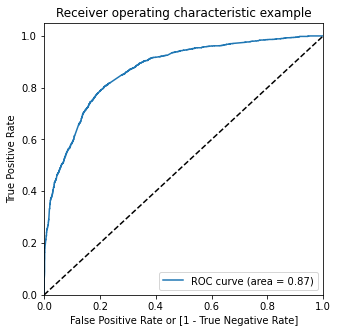

In [69]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve is 0.87 which indicates a goof model. Now the sensitivity and specificity tradeoff can be checked to find the optimal cutoff point. 

### Finding optimal cutoff point

In [71]:
# Create columns with different probablity cutoffs
numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.315409,0,1,1,1,1,0,0,0,0,0,0
1,0,0.094901,0,1,0,0,0,0,0,0,0,0,0
2,1,0.083415,0,1,0,0,0,0,0,0,0,0,0
3,1,0.384964,0,1,1,1,1,0,0,0,0,0,0
4,1,0.958362,1,1,1,1,1,1,1,1,1,1,1


In [72]:
# Calculate accuracy, sensitivity and specificity at different probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positives 
# TN = confusion[0,0] # true negatives 
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.569379  0.986505  0.181661
0.2   0.2  0.709482  0.946021  0.489619
0.3   0.3  0.769334  0.897627  0.650087
0.4   0.4  0.792199  0.810610  0.775087
0.5   0.5  0.791078  0.743602  0.835208
0.6   0.6  0.774042  0.671940  0.868945
0.7   0.7  0.741986  0.554211  0.916522
0.8   0.8  0.717104  0.463006  0.953287
0.9   0.9  0.650975  0.293625  0.983131


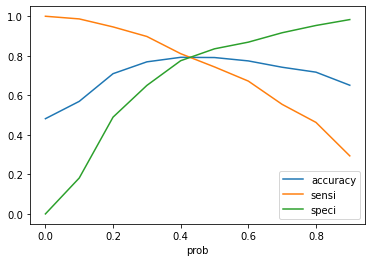

In [73]:
# Plot the cutoff point
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()